## Matplotlib
Esta es una libreria usada para la creación de gráficos a partir de datos o variables.
La manera de importar esta libreria es la siguiente:
```
import matplotlib
```
en especifico, nosotros usaremos el modulo de pyplot, el cual se importa de la siguiente manera:
```
import matplotlib.pyplot as plt
```

In [1]:
import matplotlib.pyplot as plt
"""
Importaremos las librerias de numpy y pandas para su uso posterior
"""
import numpy as np
import pandas as pd

### Creación de graficas de lineas
En esta parte crearemos una grafica común de una función dada, esta en forma de lineas, con sus respectivo eje xy. El comando principal es el siguiente:
```
plt.plot(x,y)
```

Text(0.5, 1.0, '$f(x)=-3x^3+5x^2+x-10$')

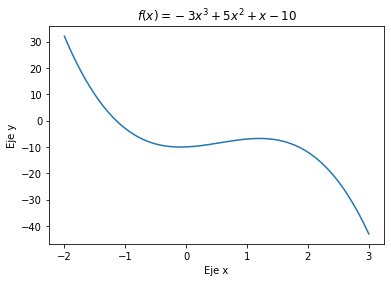

In [2]:
# Definición de la función a gráficar
def f(x):
    return -3*x**3+5*x**2+x-10
# Creación de los valores (Dominio de la funcion)
x=np.linspace(-2,3,1000)
# Calculo de los valores de f(x)
y=f(x)
# Ploteo de la linea
plt.plot(x,y)
# Nombres de los ejes x y y respectivamente
plt.xlabel("Eje x")
plt.ylabel("Eje y")
# Titulo de la gráfica (En cualquier momento se puede usar la escritura de LaTeX)
plt.title("$f(x)=-3x^3+5x^2+x-10$")

Si quisieramos algo más personalizado tenenos las siguientes propiedades de la funcion plt.plot, estas funciones estan definidas para otro tipo de gráficas pero pueden cambiar de nombre.

| Propiedad       | Código    |
|-----------------|-----------|
| color           | ``color=""``  |
| Estilo de linea | ``ls=""``     |
| Grosor de linea | ``lw=""``     |
| Tipo de punto   | ``marker=""`` |

Text(0.5, 1.0, '$f(x)=-3x^3+5x^2+x-10$')

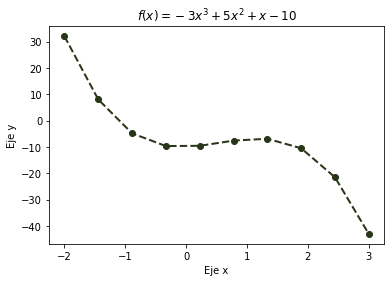

In [3]:
# Creación de los valores (Dominio de la funcion)
x=np.linspace(-2,3,10)
# Calculo de los valores de f(x)
y=f(x)
# Ploteo de la linea
plt.plot(x,y,color="#283618",ls="--",lw=2,marker="o")
# Nombres de los ejes x y y respectivamente
plt.xlabel("Eje x")
plt.ylabel("Eje y")
# Titulo de la gráfica (En cualquier momento se puede usar la escritura de LaTeX)
plt.title("$f(x)=-3x^3+5x^2+x-10$")

## Creación de graficas de varias lineas con su etiqueta
Para este tipo de gráfica tendremos que hacer uso de dos cosas, el argumento ``label`` de las graficas y el comando ``plt.legend``, para generar las etiquetas y diferencias entre cada linea. Para este caso haremos uso de los datos almacenados en el archivo "data_and_fit.csv"

(0.0, 650.0)

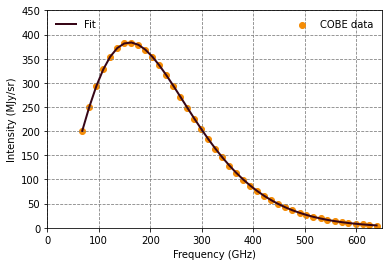

In [4]:
data=pd.read_csv("Datos/data_and_fit.csv")
# Ploteo en forma de puntos de color naranja con la etiqueta COBE data
plt.scatter(data["Frecuency"],data["Data"], marker="o", label="COBE data", c="#f48c06")
# Ploteo de los datos en forma en linea con un color marron
plt.plot(data["Frecuency"], data["Fit"], label="Fit", color="#370617", lw="2")
# Ploteo de cada leyenda a dos columnas que abarque toda la grafica y sin un recuadro
plt.legend(ncol=2, mode="expand", frameon=False)
# Ploteo de la grilla de color gris
plt.grid(ls="--", color="grey")
# Ploteo de las etiquetas de los ejes
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (MJy/sr)")
# Limites de las graficas
plt.ylim(0, 450)
plt.xlim(0, 650)

## Mapas de color
Los mapas de color son un tipo de gráfica la cual es usualmente utilizada cuando se trata de representar una figura de R3 en un espacio R2, esto es porque se quiere mostrar el comportamiento en su totalidad, algunas veces tambien es llamado mapa de calor. El comando para hacer uso de este tipo de grafica es el siguiente:
```
plt.contourf(data)
```
Para este caso usaremos los datos almacenados en el archivo Ozono_OMI.csv

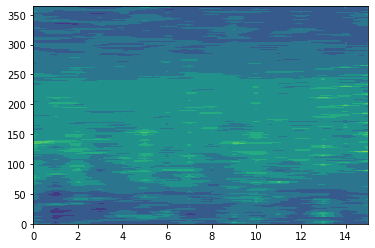

In [5]:
data=np.loadtxt("Datos/Ozono_OMI.csv",delimiter=",",usecols=np.arange(1,17),skiprows=1)
plt.contourf(data)

No es común ver un mapa de color sin una barra que especifique que valores tiene cada color, para crearla se necesita el siguiente comando:
```
plt.colorbar()
```

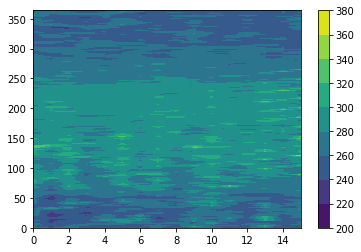

In [6]:
data=np.loadtxt("Datos/Ozono_OMI.csv",delimiter=",",usecols=np.arange(1,17),skiprows=1)
plt.contourf(data)
plt.colorbar()

## Atributo colormaps (cmap)
Si quisieramos cambiar la paleta de colores que se usa en el contourf, tenemos que especificar el colormap (cmap), el listado de los mapas existentes se encuentran en la documentación de matplotlib https://matplotlib.org/stable/tutorials/colors/colormaps.html
y para cambiarla es de la siguiente manera:
```
plt.contourf(data,cmap="nombre del colormap")
```

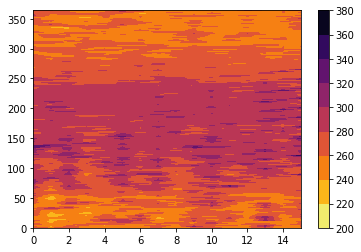

In [7]:
data=np.loadtxt("Datos/Ozono_OMI.csv",delimiter=",",usecols=np.arange(1,17),skiprows=1)
plt.contourf(data,cmap="inferno_r")
plt.colorbar()

## Cambios en las etiquetas de los ejes (ticks)
Este cambio al principio es complicado, pero una vez se entiende y se aplica se ve su utilidad, esta serie de comandos esta especificado para el cambio del las etiquetas de cada eje, ya sea porque tienen una apariencia que no nos agrada o simplemente esta mal. Por ejemplo, en la grafica anterior el eje y va desde 0 a 364, estos son los dias del año, pero que pasa si quisieramos cambiar esto por algunos meses? o en el eje x, viene enumerado del 0 al 16, pero esto realmente son los años desde el 2005 hasta el 2020. En este tipo de casos es donde entra este cambio.

El comando para el uso de este es el siguiente
```
plt.xtiks(valores en la grafica, cambios que queremos hacer)
plt.ytiks(valores en la grafica, cambios que queremos hacer)
```

Text(0, 0.5, 'Total Ozone Column (DU)')

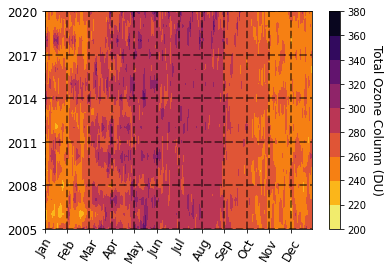

In [35]:
# Funcion que devuelve el nombre del mes a partir de una lista del numero de los meses
def obtain_month_names(months):
    import datetime
    names = []
    for month in months:
        date = datetime.date(2020, month, 1)
        names.append(date.strftime("%b"))
    return names

# Funcion para asignar que año corresponde a cada numero en la grafica
def define_yticks(year_i, year_f, delta):
    years = np.arange(year_i, year_f, delta)
    if not(year_f in years):
        years = np.append(years, year_f)
    nums = years-year_i
    return nums, years

data=np.loadtxt("Datos/Ozono_OMI.csv",delimiter=",",usecols=np.arange(1,17),skiprows=1)
data=np.transpose(data)
plt.contourf(data,cmap="inferno_r")
# Aqui se obtienen las listas de los numeros y los años empezando desde el 2015 hasta el 2020
# llendo de 3 en 3
nums, years = define_yticks(2005, 2020, 3)
# Nombre de todos los meses
Meses = obtain_month_names(np.arange(1, 13))
# Division de los dias consecutivos correspondientes a cada mes (aproximacion)
daysnum = np.arange(0, 365, 30.5)
# Cambio en el eje x
plt.xticks(daysnum, Meses, fontsize="large",rotation=60)
# Cambio en el eje y
plt.yticks(nums, years, fontsize="large")
plt.grid(ls="--",color="#000",lw=2,alpha=0.5)

"""
Añadir etiqueta a la barra de color
comando normal
plt.colorbar()
"""
cbar = plt.colorbar()
cbar.ax.set_ylabel("Total Ozone Column (DU)", rotation=-90, va="bottom", fontsize="large")

### Atributo subplots
Supongamos que tenemos ciertos datos pero estos tienen que estar puestos en graficas distintas, pero dentro de un mismo recuadro, como se la siguiente manera:

<img src="https://matplotlib.org/stable/_images/sphx_glr_subplots_demo_005.png">

El comando a usar sera:
```
fig,axs=plt.subplots(# de graficas en fila, # de graficas en columna)
```

Para este caso usaremos los archivos solution.csv y map_data.csv

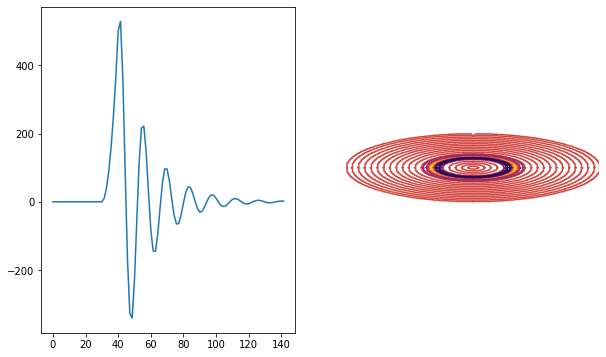

In [52]:
data_solution=pd.read_csv("Datos/solution.csv")
data_map=np.loadtxt("Datos/map_data.csv",delimiter=",")
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(10, 6))
# Grafica de la izquierda
ax1.plot(data_solution["R"],data_solution["Solution"])
# Eliminacion de las etiquetas de la grafica dererecha
ax2.axis("off")
ax2.contour(data_map,cmap="inferno_r")

# Otro ejemplo
Para este caso usaremos los archivos 3_coor_3.dat para mostrar como seria la creación de una serie de cuatro subplots

Creando graficas


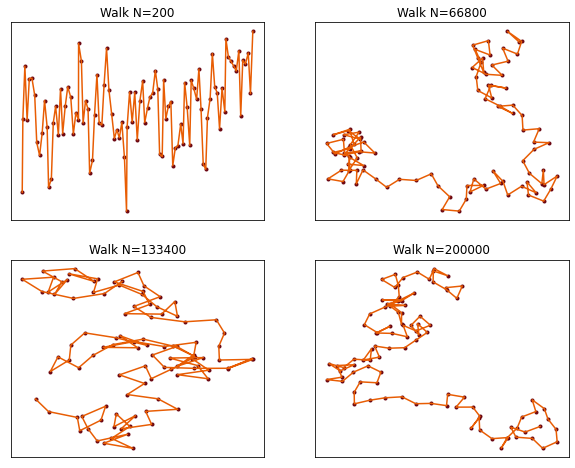

In [75]:
n_part=100
n=1000
walks=np.arange(200,200200,200)
#<---------------------------Numero de pasos---------------------------->
pos_walks=[0,int(n/3),int(2*n/3),n-1]
n_walks=walks[pos_walks]
fig,axs=plt.subplots(2, 2,figsize=(10,8))
#<----------------------------Lista de axs------------------------->
axs=np.reshape(axs,4)
print("Creando graficas")
for walk,walk_real,ax in zip(pos_walks,n_walks,axs):
    #<--------------------------------Lectura de las posiciones------------------------------------->
    pos_x,pos_y=np.loadtxt("Datos/3_coor_3.dat",unpack=True,usecols=[0,1],skiprows=walk*(n_part+1)+1,max_rows=n_part)
    #<----------------------------Renombramiento de los bordes--------------------------_>
    ax.set_yticks([]);ax.set_xticks([])
    ax.set_title("Walk N="+str(int(walk_real)))
    ax.scatter(pos_x,pos_y,c="#6a040f",marker=".")
    ax.plot(pos_x,pos_y,color="#e85d04",ls="-")

## "Graficar pixeles"
Para representar pixeles con matplotlib es usual utilizar el comando 
```
plt.imshow()
```
ya que el mismo comando hace referencia a como si estuviera "graficando" una imagen.

En este caso crearemos una matriz con numeros aleatorios entre 0-1 y así saber como funciona esa función.

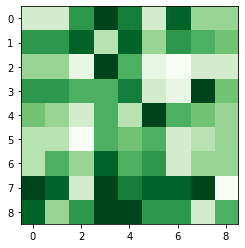

In [55]:
matriz=np.random.random((9,9))
matriz=np.round(matriz,1)
plt.imshow(matriz,cmap="Greens")

## Guardar gráficas hechas
Para realizar el guardado de la gráfica creada se tiene que usar el siguiente comando:
```
plt.savefig(nombre de la imagen)
```

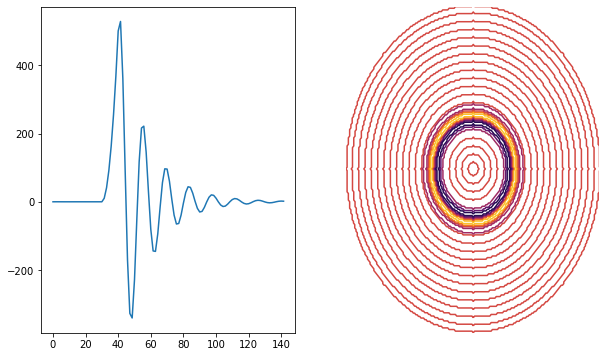

In [60]:
data_solution=pd.read_csv("Datos/solution.csv")
data_map=np.loadtxt("Datos/map_data.csv",delimiter=",")
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10, 6))
# Grafica de la izquierda
ax1.plot(data_solution["R"],data_solution["Solution"])
# Eliminacion de las etiquetas de la grafica dererecha
ax2.axis("off")
ax2.contour(data_map,cmap="inferno_r")
plt.savefig("circulos.png")